# Pandas part 2

Let's start with the usual imports:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

Also install the following library (if you haven't, yet):

In [4]:
#!pip install --upgrade pandas-datareader

## OnLine Data Sources


<a id='index-4'></a>
Python makes it pretty easy for us to query online databases programmatically.

An important database for economists is [FRED](https://research.stlouisfed.org/fred2/) — a vast collection of time series data maintained by the St. Louis Fed.

For example, suppose that we are interested in the [unemployment rate](https://research.stlouisfed.org/fred2/series/UNRATE).

Via FRED, the entire series for the US civilian unemployment rate can be downloaded directly by entering
this URL into your browser (note that this requires an internet connection)

(To download the data as a csv, click here: [https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE](https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE&cosd=1948-01-01&coed=2024-06-01&fq=Monthly&transformation=lin))


This request returns a CSV file.

Alternatively, we can access the CSV file from within a Python program.

This can be done with a variety of methods.

We start with a relatively low-level method and then return to pandas.

### Accessing Data with requests


<a id='index-6'></a>
One option is to use [requests](https://requests.readthedocs.io/en/master/), a standard Python library for requesting data over the Internet.

To begin, try the following code on your computer

In [7]:
r = requests.get('https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE&cosd=1948-01-01&coed=2024-06-01&fq=Monthly&transformation=lin')

If there’s no error message, then the call has succeeded.

If you do get an error, then there are two likely causes

1. You are not connected to the Internet — hopefully, this isn’t the case.  
1. Your machine is accessing the Internet through a proxy server, and Python isn’t aware of this.  


In the second case, you can either

- switch to another machine  
- solve your proxy problem by reading [the documentation](https://requests.readthedocs.io/en/master/)  


Assuming that all is working, you can now proceed to use the `source` object returned by the call `requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')`

In [9]:
#url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2024-06-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-07-29&revision_date=2024-07-29&nd=1948-01-01'
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE&cosd=1948-01-01&coed=2024-06-01&fq=Monthly&transformation=lin'
source = requests.get(url).content.decode().split("\n")
source[0]

'observation_date,UNRATE'

In [10]:
source[1]

'1948-01-01,3.4'

In [11]:
source[2]

'1948-02-01,3.8'

To see all entries in the file, just run ```source```

We could now write some additional code to store the data as an array.

But this is unnecessary — pandas’ `read_csv` function can handle the task for us.

We use `parse_dates=True` so that pandas recognizes our dates column, allowing for simple date filtering

In [14]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

The data has been read into a pandas DataFrame called `data` that we can now manipulate in the usual way

In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
data.head()  # A useful method to get a quick look at a data frame

,UNRATE
observation_date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [18]:
pd.set_option('display.precision', 1)
data.describe()  # Your output might differ slightly

,UNRATE
count,918.0
mean,5.7
std,1.7
min,2.5
25%,4.4
50%,5.5
75%,6.7
max,14.8


We can also plot the unemployment rate from 2006 to 2012 as follows

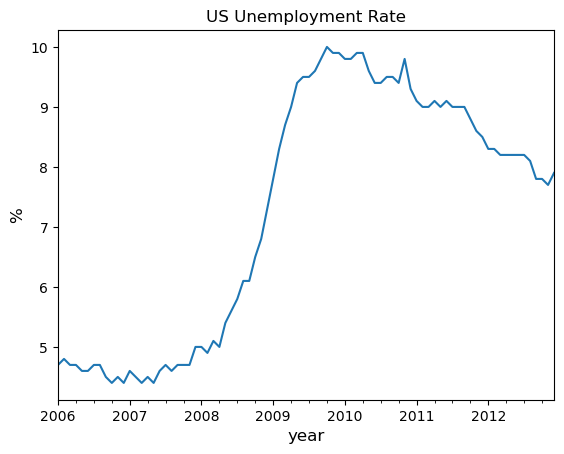

In [20]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

Note that pandas offers many other file type alternatives (click [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for more information)

### Using pandas_datareader to Access Data


<a id='index-9'></a>
The makers of pandas also provide a library called
[pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/) that
gives programmatic access to many data sources straight from the Jupyter notebook.

While some sources require an access key, many of the most important ones (e.g., FRED, [OECD](https://data.oecd.org/), [EUROSTAT](https://ec.europa.eu/eurostat/data/database) and the World Bank) are free to use.

Let's work through an example of downloading and plotting data — this
time from the World Bank.


There are also other [python libraries](https://data.worldbank.org/products/third-party-apps)
available for working with world bank data such as [wbgapi](https://pypi.org/project/wbgapi/)

The World Bank [collects and organizes data](http://data.worldbank.org/indicator) on a huge range of indicators.

For example, [here’s](http://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS/countries) some data on government debt as a ratio to GDP.

The next code example fetches the data for you and plots time series for the US, Switzerland and Australia.

C:\Users\saman\AppData\Local\Temp\ipykernel_36512\234477144.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'CHE', 'AU'], start=2005, end=2025).stack().unstack(0)


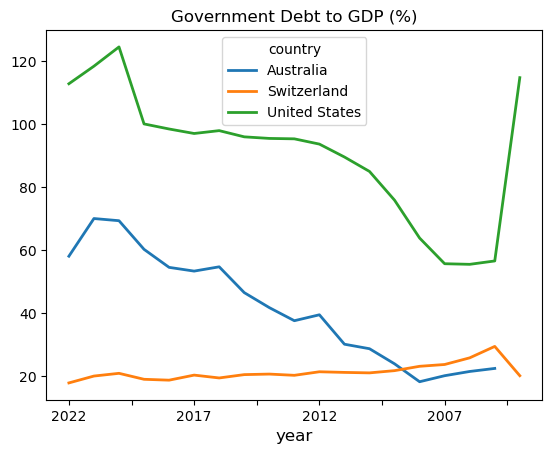

In [25]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'CHE', 'AU'], start=2005, end=2025).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

We can again look at some summary statistics, etc.

In [27]:
govt_debt.describe()

country,Australia,Switzerland,United States
count,18.0,19.0,19.0
mean,41.7,21.3,90.9
std,17.3,2.7,21.0
min,18.2,17.8,55.5
25%,25.1,20.0,80.4
50%,40.6,20.6,95.5
75%,54.6,21.5,99.3
max,70.0,29.4,124.5


In [29]:
govt_debt.head()

country,Australia,Switzerland,United States
year,,,
2022,58.0,17.8,112.8
2021,70.0,20.0,118.4
2020,69.3,20.9,124.5
2019,60.2,19.0,100.1
2018,54.5,18.7,98.4


## Exercise to do in class

Download and plot the inflation rate (based on the consumer price index) for the US, Switzerland, and Germany for the period from 1970 to 2024.

C:\Users\saman\AppData\Local\Temp\ipykernel_36512\2451588532.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  inflation = wb.download(indicator='FP.CPI.TOTL.ZG', country=['US', 'CHE', 'DEU'], start=1970, end=2024).stack().unstack(0)


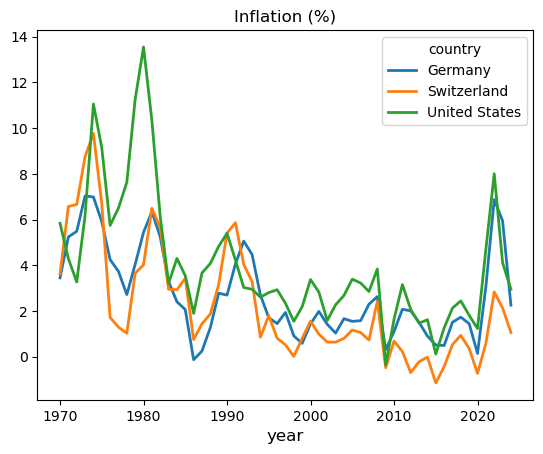

In [34]:
# Solution 
inflation = wb.download(indicator='FP.CPI.TOTL.ZG', country=['US', 'CHE', 'DEU'], start=1970, end=2024).stack().unstack(0)
ind = inflation.index.droplevel(-1)
inflation.index = ind
ax = inflation.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Inflation (%)")
plt.show()